<a href="https://colab.research.google.com/github/MinSetKhant/Sales-Analysis-Prediction-Portfolio/blob/main/Sales_Analysis_and_Prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [12]:
# Portfolio Exaple with Google Colab: Sales Analysis & Prediction
# Author: MinSet Khant
# Date: 2025-12-17

In [2]:
# Step 1: Install and Import Libraries
!pip install -q seaborn scikit-learn

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

In [3]:
# Step 2: Generate Synthetic Data
np.random.seed(42)
data = pd.DataFrame({
    'Month': pd.date_range(start='2025-01-01', periods=12, freq='M'),
    'Sales': np.random.randint(1000, 5000, size=12),
    'Advertising': np.random.randint(500, 2000, size=12),
    'Employees': np.random.randint(5, 20, size=12)
})

# Save dataset for portfolio demonstration
data.to_csv('sales_data.csv', index=False)
print("Dataset Sample:")
print(data.head())

Dataset Sample:
       Month  Sales  Advertising  Employees
0 2025-01-31   4174          830          6
1 2025-02-28   4507         1982         16
2 2025-03-31   1860          587          9
3 2025-04-30   2294         1896          5
4 2025-05-31   2130         1623         16


/tmp/ipython-input-275345094.py:4: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  'Month': pd.date_range(start='2025-01-01', periods=12, freq='M'),


In [4]:
# Step 3: Data Analysis
print("\nData Summary:")
print(data.describe())



Data Summary:
                     Month        Sales  Advertising  Employees
count                   12    12.000000    12.000000  12.000000
mean   2025-07-15 22:00:00  2952.916667  1342.083333  11.833333
min    2025-01-31 00:00:00  1466.000000   587.000000   5.000000
25%    2025-04-22 12:00:00  2121.250000   839.750000   8.250000
50%    2025-07-15 12:00:00  2466.000000  1338.000000  13.500000
75%    2025-10-07 18:00:00  4112.500000  1848.000000  16.000000
max    2025-12-31 00:00:00  4772.000000  1982.000000  17.000000
std                    NaN  1145.050095   520.947992   4.608950


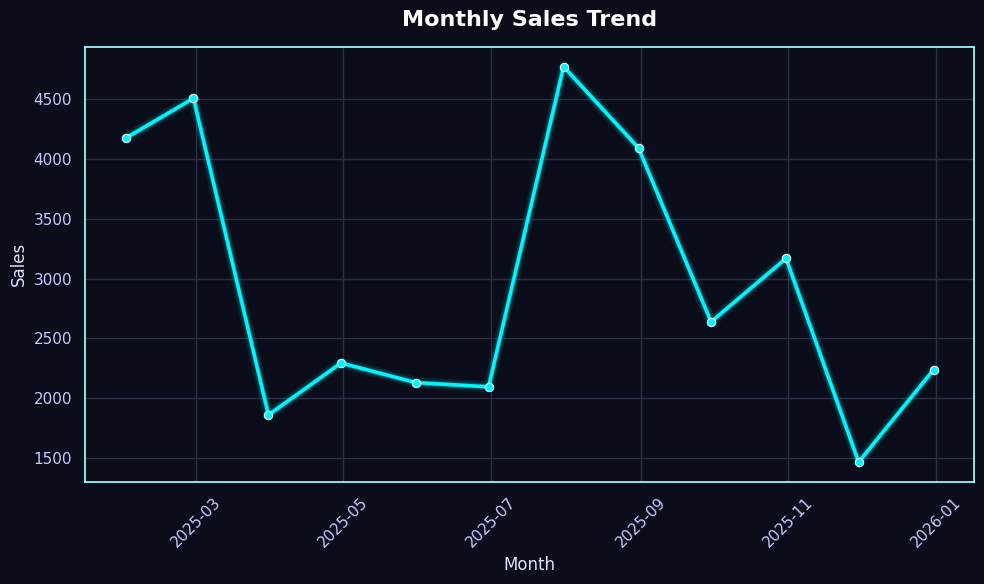

In [14]:
# Step (4) Visualization

import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

# -------------------------------
# Global Cyber Aesthetic Settings
# -------------------------------
plt.style.use("dark_background")
sns.set_theme(
    style="darkgrid",
    rc={
        "axes.facecolor": "#0b0e1a",
        "figure.facecolor": "#0b0e1a",
        "grid.color": "#2a2e45",
        "axes.edgecolor": "#9efeff",
        "axes.labelcolor": "#e0e0ff",
        "xtick.color": "#c8c8ff",
        "ytick.color": "#c8c8ff",
        "text.color": "#ffffff"
    }
)

# ===============================
# Monthly Sales Trend (Neon Line)
# ===============================
plt.figure(figsize=(10,6))

# Glow effect (draw same line multiple times)
for lw, alpha in zip([8, 5, 3], [0.08, 0.15, 0.3]):
    sns.lineplot(
        x='Month',
        y='Sales',
        data=data,
        color="#00f5ff",
        linewidth=lw,
        alpha=alpha
    )

sns.lineplot(
    x='Month',
    y='Sales',
    data=data,
    marker='o',
    linewidth=2.5,
    color="#00f5ff"
)

plt.title("Monthly Sales Trend", fontsize=16, weight="bold", pad=15)
plt.xlabel("Month")
plt.ylabel("Sales")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()



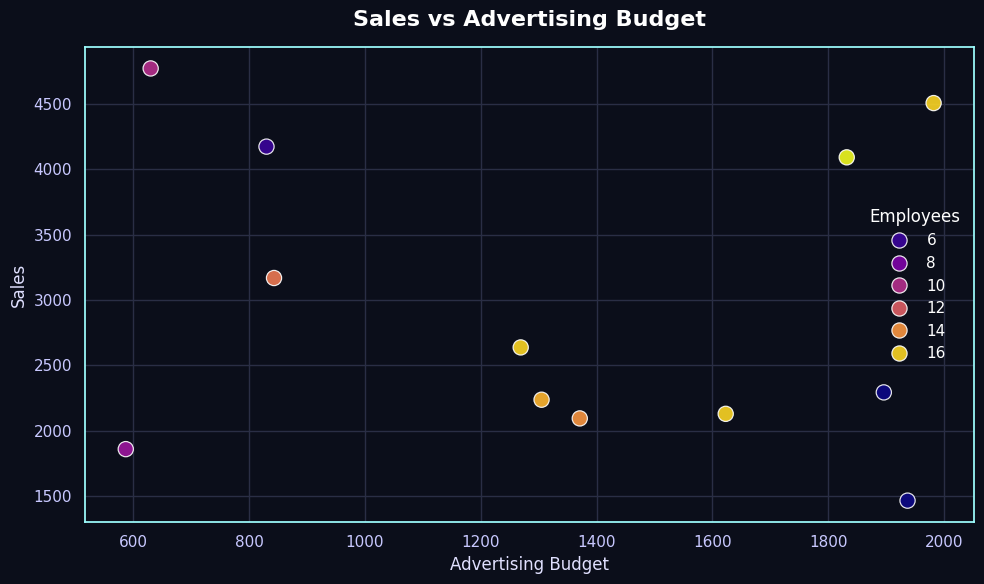

In [11]:
# ===============================
# Sales vs Advertising (Cyber Scatter)
# ===============================
plt.figure(figsize=(10,6))

sns.scatterplot(
    x='Advertising',
    y='Sales',
    data=data,
    hue='Employees',
    palette="plasma",
    s=120,
    edgecolor="#ffffff",
    alpha=0.9
)

plt.title("Sales vs Advertising Budget", fontsize=16, weight="bold", pad=15)
plt.xlabel("Advertising Budget")
plt.ylabel("Sales")
plt.legend(title="Employees", frameon=False)
plt.tight_layout()
plt.show()

In [10]:
# Step 5: Simple Linear Regression Model
X = data[['Advertising', 'Employees']]
y = data['Sales']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3,
                                                    random_state=42)
model = LinearRegression()
model.fit(X_train, y_train)

y_pred = model.predict(X_test)

print("\nModel Performance:")
print("R^2 Score:", r2_score(y_test, y_pred))
print("Mean Squared Error:", mean_squared_error(y_test, y_pred))


Model Performance:
R^2 Score: -0.09350282683969224
Mean Squared Error: 1042814.8018361452


In [13]:
# Step 6: Export Predictions
predictions = pd.DataFrame({'Actual': y_test, 'Predicted': y_pred})
predictions.to_csv('sales_predictions.csv', index=False)
print("\nPredictions Saved:")
print(predictions)


Predictions Saved:
    Actual    Predicted
10    1466  2508.315231
9     3169  2988.702242
0     4174  2522.605243
8     2638  3208.286105
